<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Experiments/Refreshing_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Apr 19 22:57:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

# Working Food101 Dataset

In [3]:
# Get helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-04-19 22:57:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-04-19 22:57:38 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

# List all the available datasets in tensorflow datasets
datasets_list = tfds.list_builders()

# Is our food101 dataset available? 
print('food101' in datasets_list)

True


In [5]:
# Loading the food101 data for our use 
(train_data , test_data) , ds_info = tfds.load(name = 'food101' , 
                                               split = ['train' , 'validation'] , 
                                               shuffle_files = True , 
                                               as_supervised = True, # data in tuple format (image , label)
                                                with_info = True) 

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteJJBUCR/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteJJBUCR/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [6]:
# Features of Food101 TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [9]:
# Getting the class names 
class_names = ds_info.features['label'].names
print(class_names[:10]) # First 10 

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [10]:
# How many class names are there? 
len(class_names)

101

In [11]:
# Take one sample from our train_data 
train_one_sample = train_data.take(1) # (image tensor , label)

In [12]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [13]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 16
  Class name (str form): cheesecake
        


In [14]:
# What does an image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

In [15]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

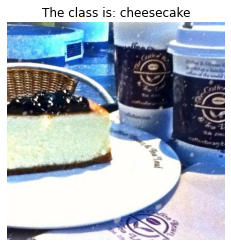

In [16]:
# Plotting an image tensor 
import matplotlib.pyplot as plt 
plt.imshow(image)
plt.title(f'The class is: {class_names[label.numpy()]}')
plt.axis(False)

In [17]:
# Data type our tensor from tfds 
image.dtype

tf.uint8

In [18]:
# Making a preprocess function 
def preprocess_img(image , label , img_shape = 224):
  '''
  Converts image datatypes from 'uint8' to 'float32' 
  Reshapes image to (img_shape , img_shape , color_channels)
  '''
  image = tf.image.resize(image , size = [img_shape , img_shape]) # reshapes to [224 , 224]
  return tf.cast(image , tf.float32) , label

In [19]:
# Checking the output of the preprocessed image and normal image
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 85  84  92]
  [ 86  85  93]
  [ 93  92 100]
  ...
  [120 196 245]
  [120 198 246]
  [121 199 247]]

 [[ 88  88  96]
  [ 82  82  90]
  [ 88  88  96]
  ...
  [116 192 244]
  [118 195 249]
  [119 196 248]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 84.67857   84.321434  92.321434]
  [ 87.19898   86.841835  94.841835]
  [ 84.72959   84.581635  94.72449 ]
  ...
  [119.50503  194.93877  245.85202 ]
  [114.974525 190.97452  241.90309 ]
  [119.071465 196.4286   247.82652 ]]

 [[ 75.647964  84.21939   93.21939 ]
  [ 71.45407   80.959175  89.959175]
  [ 78.03061   87.20408   97.47449 ]
  ...
  [113.31632  182.62755  249.35715 ]
  [106.57655  176.86227  245.4337  ]
  [108.601944 179.9796   248.16833 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


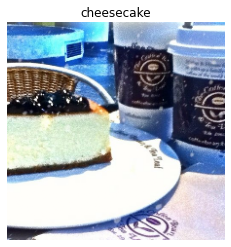

In [20]:
# We can still plot our preprocessed image as long as we 
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

In [21]:
# Map the preprocessing function to our training data (paralellize)
train_data = train_data.map(map_func= preprocess_img , num_parallel_calls= tf.data.AUTOTUNE)

# Shuffle train data and turn into batches and prefetch it (load the data faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Mapping the preprocessing function on the test data 
test_data = test_data.map(map_func = preprocess_img , num_parallel_calls= tf.data.AUTOTUNE)

# Creating batches of our test data and enabling prefetch 
test_data = test_data.batch(batch_size= 32).prefetch(tf.data.AUTOTUNE) # Use the max processor for us

In [22]:
# How does the data looks like? 
train_data , test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [23]:
# Gonna create two modelcheckpoint callback 

# Defining the filepaths 
checkpoint_path_1 = 'model_checkpoint_1/cp.ckpt'
checkpoint_path_2 = 'model_checkpoint_2/cp.ckpt'

# Creating our callbacks 
model_checkpoint_1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_1 , 
                                                        monitor = 'val_accuracy' , 
                                                        save_best_only = True , 
                                                        save_weights_only = True)

model_checkpoint_2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_2 , 
                                                        monitor = 'val_accuracy' , 
                                                        save_best_only = True , 
                                                        save_weights_only = True)

In [24]:
# Creating EarlyStopping callback 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , 
                                                  min_delta = 0.5 , 
                                                  patience = 2 , 
                                                  restore_best_weights = True , 
                                                  verbose = 1)

In [48]:
# Creating a augmentation layer 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = Sequential([
  preprocessing.RandomFlip(), # randomly flip images on horizontal edge
  preprocessing.RandomHeight(0.1), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.1), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.1)
] , name = 'augmentation_layer')

In [26]:
# Turn on mixed precision 
from tensorflow.keras import mixed_precision 
mixed_precision.set_global_policy(policy = 'mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [67]:
# Creating a function which would return us a model 
def create_model(num_classes , input_shape = (224 , 224, 3)):

  # Create the input layer 
  input_shape = input_shape
  inputs = layers.Input(shape = input_shape , name = 'Input_layer')  

  # Creating a base model of EfficientNetBo 
  base_model = tf.keras.applications.EfficientNetB4(include_top= False)
  # Freeze base model layer (all layers)
  base_model.trainable = False

  # Starting to construct a functional model 
  x = data_augmentation(inputs)
  x = base_model(x , training = False)

  # Adding a dropout layer 
  x = layers.Dropout(0.4)(x)

  # Pooling layer
  x = layers.GlobalAveragePooling2D(name = 'pooling_2d_layer')(x)

  # Our output number of classes 
  x = layers.Dense(num_classes)(x)

  # Separate activation layer (since we're using mixed precision)
  outputs = layers.Activation('softmax' , dtype = tf.float32 , name = 'output_layer')(x)

  # Packing into a model 
  model = tf.keras.Model(inputs , outputs)

  return model 

In [52]:
# Using our function and creating a model 
model = create_model(num_classes= len(class_names))

# Compile the model 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

In [53]:
# Getting the summary of the model 
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
augmentation_layer (Sequenti (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, None, 1280)  0         
_________________________________________________________________
pooling_2d_layer (GlobalAver (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 101)               129381    
_________________________________________________________________
output_layer (Activation)    (None, 101)               0   

In [54]:
def feature_extractor_trainer(train_data , 
                              model,
                              test_data , test_pct = 0.15 , initial_epochs = 3 , 
                              callbacks = [model_checkpoint_1] ):
  history = model.fit(train_data , 
                      epochs = initial_epochs , 
                      validation_data = test_data , 
                      validation_steps = int(test_pct * len(test_data)) , 
                      callbacks = callbacks)
  return history

In [55]:
# Using our function to train our feature extractor model 
history_feature_model_1 = feature_extractor_trainer(train_data= train_data , 
                                                    test_data = test_data  , 
                                                    model = model)

Epoch 1/3
2368/2368 [==============================] - 168s 68ms/step - loss: 2.6386 - accuracy: 0.3934 - val_loss: 1.3482 - val_accuracy: 0.6488
Epoch 2/3
2368/2368 [==============================] - 162s 68ms/step - loss: 1.6756 - accuracy: 0.5746 - val_loss: 1.2447 - val_accuracy: 0.6674
Epoch 3/3
2368/2368 [==============================] - 162s 68ms/step - loss: 1.5381 - accuracy: 0.6027 - val_loss: 1.1992 - val_accuracy: 0.6777


In [56]:
# Evaluating on the whole test data 
feature_extractor_model_1 = model.evaluate(test_data)

790/790 [==============================] - 46s 58ms/step - loss: 1.2145 - accuracy: 0.6751


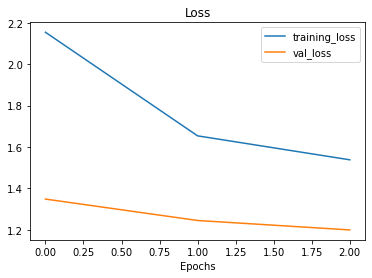

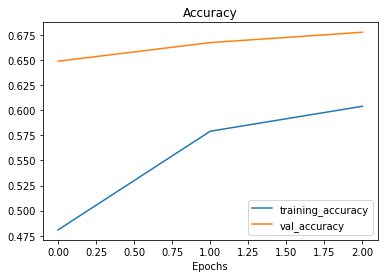

In [57]:
# Plotting the loss curves 
plot_loss_curves(history_feature_model_1)

In [58]:
# Let's create a fine tune model 
def fine_tune_trainer(train_data , 
                      test_data ,feature_extract_model  , feature_extract_history, callbacks,
                      num_fine_tune_epochs = 5 , initial_epochs = 3 ):
  
  fine_tune_epochs = initial_epochs + num_fine_tune_epochs
  history = feature_extract_model.fit(train_data , 
                                      epochs = fine_tune_epochs , 
                                      validation_data = test_data , 
                                      validation_steps = int(0.15 * len(test_data)) , 
                                      initial_epoch = feature_extract_history.epoch[-1] , 
                                      callbacks = callbacks)

  return history

In [59]:
# Unfreeze all the layers in the base model 
model.layers[2].trainable = True 

# Refreeze every layers except for the last 5 
for layer in model.layers[2].layers[:-6]:
  layer.trainable = False

In [60]:
# Check which layers are trainable (last 5 layers should be True)
for layer_num , layer in enumerate(model.layers[2].layers):
  print(layer_num , layer.name , layer.dtype_policy ,  layer.trainable)

0 input_4 <Policy "float32"> False
1 rescaling_3 <Policy "mixed_float16"> False
2 normalization_3 <Policy "float32"> False
3 stem_conv_pad <Policy "mixed_float16"> False
4 stem_conv <Policy "mixed_float16"> False
5 stem_bn <Policy "mixed_float16"> False
6 stem_activation <Policy "mixed_float16"> False
7 block1a_dwconv <Policy "mixed_float16"> False
8 block1a_bn <Policy "mixed_float16"> False
9 block1a_activation <Policy "mixed_float16"> False
10 block1a_se_squeeze <Policy "mixed_float16"> False
11 block1a_se_reshape <Policy "mixed_float16"> False
12 block1a_se_reduce <Policy "mixed_float16"> False
13 block1a_se_expand <Policy "mixed_float16"> False
14 block1a_se_excite <Policy "mixed_float16"> False
15 block1a_project_conv <Policy "mixed_float16"> False
16 block1a_project_bn <Policy "mixed_float16"> False
17 block2a_expand_conv <Policy "mixed_float16"> False
18 block2a_expand_bn <Policy "mixed_float16"> False
19 block2a_expand_activation <Policy "mixed_float16"> False
20 block2a_dwconv

In [61]:
# Compiling the model 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-2/10) , 
              metrics = ['accuracy'])

In [63]:
# Fine tuning our model 
history_fine_tune_model_1 = fine_tune_trainer(train_data , 
                                              test_data , 
                                              model , 
                                              history_feature_model_1 , 
                                              num_fine_tune_epochs = 15 , 
                                              callbacks = [lr_scheduler_1])

Epoch 3/18
2368/2368 [==============================] - 170s 69ms/step - loss: 1.3860 - accuracy: 0.6382 - val_loss: 1.0817 - val_accuracy: 0.7119
Epoch 4/18
2368/2368 [==============================] - 165s 69ms/step - loss: 1.2545 - accuracy: 0.6682 - val_loss: 1.0439 - val_accuracy: 0.7119
Epoch 5/18
2368/2368 [==============================] - 163s 68ms/step - loss: 1.1575 - accuracy: 0.6930 - val_loss: 1.0322 - val_accuracy: 0.7209
Epoch 6/18
2368/2368 [==============================] - 164s 69ms/step - loss: 1.0799 - accuracy: 0.7118 - val_loss: 1.0017 - val_accuracy: 0.7293
Epoch 7/18
2368/2368 [==============================] - 164s 68ms/step - loss: 1.0251 - accuracy: 0.7240 - val_loss: 1.0132 - val_accuracy: 0.7222
Epoch 8/18
2368/2368 [==============================] - 164s 68ms/step - loss: 0.9602 - accuracy: 0.7353 - val_loss: 1.0061 - val_accuracy: 0.7275
Epoch 9/18
2368/2368 [==============================] - 163s 68ms/step - loss: 0.9145 - accuracy: 0.7445 - val_loss: 1

In [64]:
# Evaluating on the full dataset 
full_result_model_1 = model.evaluate(test_data)

790/790 [==============================] - 46s 58ms/step - loss: 1.2176 - accuracy: 0.6869


Well our model is overfitting, we can do better fixing this. 

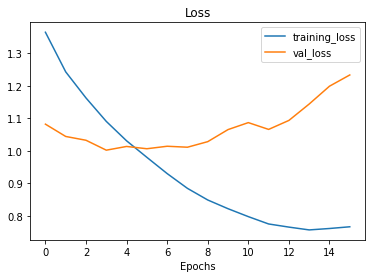

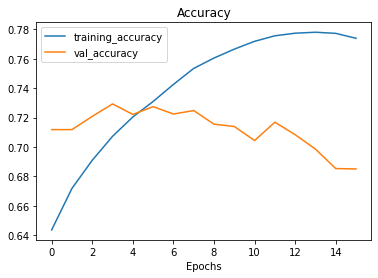

In [65]:
# Plotting the loss curves 
plot_loss_curves(history_fine_tune_model_1)

In [66]:
tf.keras.callbacks.ReduceLROnPlateau??

In [ ]:
# Let's try ReduceLRPlateau

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy' , 
                                                 patience = 2 , 
                                                 )

Hmm.. it's not overfitting but I guess training for longer will eventually overfit the model. Let's use a learning rate scheduler to tackle this learning rate issues. 

In [ ]:
def scheduler_function(epoch):


In [31]:
# Creating a learning rate scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (0.75** np.floor(epoch / 2)))
lr_scheduler_1 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
def create_modelcheckpoint_callback(folder_name):
  checkpoint_path = f'{folder_name}/cp.ckpt'

  # Creating our callbacks 
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_1 , 
                                                        monitor = 'val_accuracy' , 
                                                        save_best_only = True , 
                                                        save_weights_only = True)

Using a EfficientNetB4 now

In [74]:
# Creating a model 
model_2 = create_model(num_classes= len(class_names))

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Getting the summary of our model 
model_2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
augmentation_layer (Sequenti (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb4 (Functional)  (None, None, None, 1792)  17673823  
_________________________________________________________________
dropout_4 (Dropout)          (None, None, None, 1792)  0         
_________________________________________________________________
pooling_2d_layer (GlobalAver (None, 1792)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 101)               181093    
_________________________________________________________________
output_layer (Activation)    (None, 101)               0   

In [75]:
for layer in model_2.layers:
  print(layer , layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f18701f7210> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f191a289710> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f1810527710> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7f18104b1dd0> True
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f181041ff10> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f18105329d0> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f1806683f90> True


In [76]:

tf.config.run_functions_eagerly(True)

In [77]:
# Fitting our feature extractor model 
history_feature_model_2 = feature_extractor_trainer(train_data , 
                                                    model_2, 
                                                    test_data , 
                                                    initial_epochs = 3 , 
                                                    callbacks = [lr_scheduler_1])

Epoch 1/3
2368/2368 [==============================] - 1409s 594ms/step - loss: 3.8080 - accuracy: 0.2111 - val_loss: 2.2497 - val_accuracy: 0.5077
Epoch 2/3
2368/2368 [==============================] - 1234s 520ms/step - loss: 2.4344 - accuracy: 0.4450 - val_loss: 1.8160 - val_accuracy: 0.5670
Epoch 3/3
2368/2368 [==============================] - 1224s 516ms/step - loss: 2.1245 - accuracy: 0.4872 - val_loss: 1.6509 - val_accuracy: 0.5932


In [36]:
# Evaluating on the whole test data 
feature_results_model_2 = model_2.evaluate(test_data)

790/790 [==============================] - 55s 70ms/step - loss: 1.6910 - accuracy: 0.5809


In [78]:
for layer in model_2.layers:
  print(layer.name , layer.trainable)

Input_layer True
augmentation_layer True
efficientnetb4 False
dropout_4 True
pooling_2d_layer True
dense_6 True
output_layer True


In [79]:
# Unfreeze all the layers in the base model 
model_2.layers[2].trainable = True 

In [80]:

# Refreeze every layers except for the last 5 
for layer in model_2.layers[2].layers[:-5]:
  layer.trainable = False

In [81]:
for layer in model_2.layers[2].layers:
  print(layer.name , layer.trainable , layer.dtype_policy)

input_7 False <Policy "float32">
rescaling_6 False <Policy "mixed_float16">
normalization_6 False <Policy "float32">
stem_conv_pad False <Policy "mixed_float16">
stem_conv False <Policy "mixed_float16">
stem_bn False <Policy "mixed_float16">
stem_activation False <Policy "mixed_float16">
block1a_dwconv False <Policy "mixed_float16">
block1a_bn False <Policy "mixed_float16">
block1a_activation False <Policy "mixed_float16">
block1a_se_squeeze False <Policy "mixed_float16">
block1a_se_reshape False <Policy "mixed_float16">
block1a_se_reduce False <Policy "mixed_float16">
block1a_se_expand False <Policy "mixed_float16">
block1a_se_excite False <Policy "mixed_float16">
block1a_project_conv False <Policy "mixed_float16">
block1a_project_bn False <Policy "mixed_float16">
block1b_dwconv False <Policy "mixed_float16">
block1b_bn False <Policy "mixed_float16">
block1b_activation False <Policy "mixed_float16">
block1b_se_squeeze False <Policy "mixed_float16">
block1b_se_reshape False <Policy "mi

In [ ]:
history_fine_tune_model_2 = fine_tune_trainer(train_data , 
                                              test_data , 
                                              model_2 , 
                                              history_feature_model_2 , 
                                              num_fine_tune_epochs = 10 , 
                                              callbacks = [lr_scheduler_1])

Epoch 3/13
2368/2368 [==============================] - 1249s 527ms/step - loss: 1.9454 - accuracy: 0.5214 - val_loss: 1.5521 - val_accuracy: 0.6160
Epoch 4/13
2368/2368 [==============================] - 1247s 526ms/step - loss: 1.8600 - accuracy: 0.5374 - val_loss: 1.4915 - val_accuracy: 0.6311
Epoch 5/13
2368/2368 [==============================] - 1246s 525ms/step - loss: 1.7936 - accuracy: 0.5516 - val_loss: 1.4405 - val_accuracy: 0.6414
Epoch 6/13
2368/2368 [==============================] - 1243s 524ms/step - loss: 1.7390 - accuracy: 0.5634 - val_loss: 1.4007 - val_accuracy: 0.6422
Epoch 7/13
2368/2368 [==============================] - 1239s 523ms/step - loss: 1.6947 - accuracy: 0.5726 - val_loss: 1.3739 - val_accuracy: 0.6507
Epoch 8/13
2368/2368 [==============================] - 1248s 526ms/step - loss: 1.6502 - accuracy: 0.5837 - val_loss: 1.3328 - val_accuracy: 0.6623
Epoch 9/13
2368/2368 [==============================] - 1246s 525ms/step - loss: 1.6121 - accuracy: 0.5903

In [47]:
# Evaluate on the full test data 
results_fine_tuned_model_2 = model_2.evaluate(test_data)

790/790 [==============================] - 45s 57ms/step - loss: 1.2959 - accuracy: 0.6548
